## ML Algorithms - Regression Example


### Business Problem


For this example, we are trying to predict how much an individual customer will spend during a black Friday sale. This type of modeling is particularly useful for pricing campaigns and creating deals for specific customers.

### Import Libraries


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load Data

In [20]:
df  = pd.read_csv("train.csv")

In [21]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [22]:
df.Age.value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

### Data Preprocessing

In this section, we need to fix a few of the following columns:

**Occupation**: convert to categorical

**Maritial_status**: convert to categorical

**product_categories**: convert to categorical

**Stay_In_Current_City_Years**: convert to numeric

**Age**: Format the age

In [23]:
# Change to categorical from numeric
df['Occupation'] = pd.Categorical(df['Occupation'])
df['Marital_Status'] = pd.Categorical(df['Marital_Status'])
df['Product_Category_1'] = pd.Categorical(df['Product_Category_1'])
df['Product_Category_2'] = pd.Categorical(df['Product_Category_2'])
df['Product_Category_3'] = pd.Categorical(df['Product_Category_3'])

# Change to numeric
if df['Stay_In_Current_City_Years'].dtype == 'object':
    df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '', regex=False).astype(int)

# Fix age column
def random_age_replace(df_in, old_col, new_col):
    """
    Replaces age ranges with random integers within the specified ranges.
    
    Parameters:
        df_in (pd.DataFrame): Input DataFrame.
        old_col (str): Column with age ranges.
        new_col (str): New column for random ages.

    Returns:
        pd.DataFrame: Modified DataFrame with the new age column.
    """
    np.random.seed(1)
    df_out = df_in.copy()
    df_out[new_col] = df_out[old_col]
    
    # Iterate over unique values in the age column
    for age_range in df_out[old_col].unique():
        if '-' in age_range:  # Handle ranges like "20-30"
            low, high = map(int, age_range.split('-'))
            size = df_out[df_out[old_col] == age_range].shape[0]
            df_out.loc[df_out[old_col] == age_range, new_col] = np.random.randint(low, high, size)
        else:  # Handle single values like "55+"
            size = df_out[df_out[old_col] == age_range].shape[0]
            df_out.loc[df_out[old_col] == age_range, new_col] = np.random.randint(55, 90, size)
    
    return df_out

# Apply the function
df = random_age_replace(df, 'Age', 'New_Age')
df['New_Age'] = df['New_Age'].astype(int)


### **Exploratory Data Analysis**


<Axes: >

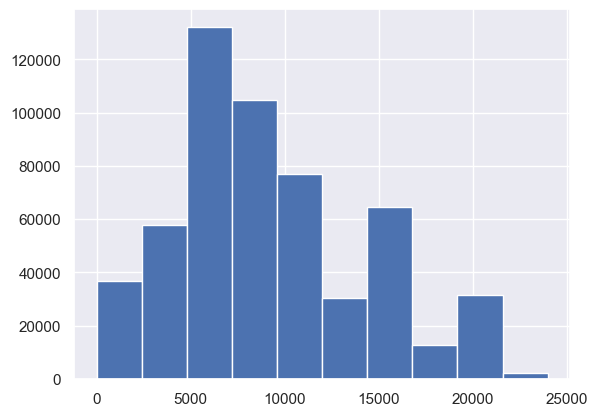

In [29]:
df.Purchase.hist()

<Axes: >

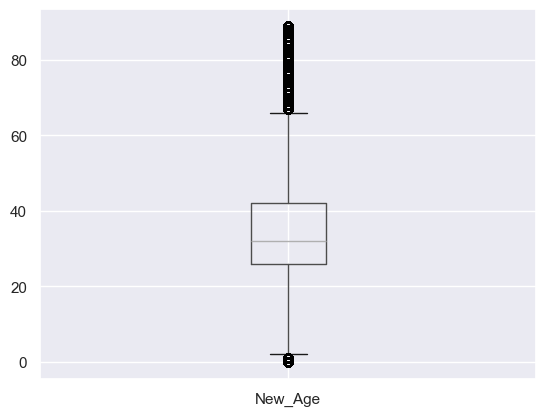

In [30]:
df.boxplot(column=['New_Age'])  


In [31]:
df.isnull().sum()/df.shape[0]


User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.315666
Product_Category_3            0.696727
Purchase                      0.000000
New_Age                       0.000000
dtype: float64

In [32]:
### data manipulation for each type of model 
## Linear Regression
    # No missing values 
    # Remove outliers 
# Ridge
# Lasso 
# Elastic Net 
## KNN 
    # feature scaling 
    # Imputation 
## SVM
    # Remove Outliers 
    # Remove missing values 
    # Scaling 
## Decision Tree
## Random Forest
## Gradient Boosted Tree
## XG Boost
## ANN  
    # Imputation 
    # scaling
    
# fix scaling / avoid leakage --> pipelines? 

" **Data Preprocessing**"

(1) Data imputation

(2) Imputing & Outlier Removal

(3) Imputing and Scaling

(4) Imputing, Scaling, and Outlier Removal

In [33]:
df.columns


Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'New_Age'],
      dtype='object')

In [34]:
# Fill imputed categories with value indicating it is nan - 21
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cols_to_impute = ['Product_Category_1',
                  'Product_Category_2',
                  'Product_Category_3']

cols_to_category = ['Gender',
                    'Occupation',
                    'City_Category',
                    'Marital_Status',
                    'Product_Category_1',
                    'Product_Category_2',
                    'Product_Category_3']

cols_to_scale = ['New_Age',
                 'Stay_In_Current_City_Years']

## Impute NaN's


In [35]:

categorical_imputer = SimpleImputer(strategy='constant', fill_value=21)

impute_preprocessor = ColumnTransformer(
    transformers=[
        ('cat_impute', categorical_imputer, cols_to_impute),
    ],remainder = 'passthrough',
    verbose_feature_names_out= False).set_output(transform='pandas')

In [36]:
## Convert Numeric to Categorical


In [37]:
from sklearn.preprocessing import FunctionTransformer

def to_category(x):
    return pd.DataFrame(x).astype("category")

to_category = FunctionTransformer(to_category)

category_preprocessor = ColumnTransformer(
    transformers=[
        ('cat_trans', to_category, cols_to_category),
    ],remainder = 'passthrough', verbose_feature_names_out= False).set_output(transform='pandas')

c:\Users\sasi virat\anaconda3\envs\myenv\lib\site-packages\sklearn\preprocessing\_function_transformer.py:343: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


## Outlier Removal


In [39]:
import scipy.stats
#adjust for X & Y 

def z_score_removal(X,y, columns, z_score):
    df = pd.concat([X, y], axis=1)
    col_df = df[columns]    
    z_scores = scipy.stats.zscore(col_df).abs()
    outliers = (z_scores.max(axis=1) > z_score)
    df_out = df[~outliers]
    X_cleaned = df_out[X.columns]
    y_cleaned = df_out.drop(X.columns, axis =1)
    return X_cleaned, y_cleaned

## Feature Engineering

## Feature Scaling



In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


scaling_preprocessor = ColumnTransformer(
    transformers=[
        ('min_max', scaler, cols_to_scale),
    ],remainder = 'passthrough', verbose_feature_names_out= False).set_output(transform='pandas')
  

## Dummy Variables


In [41]:
# Get Dummy variables 
from sklearn.preprocessing import OneHotEncoder
oh_encoder = OneHotEncoder(sparse_output=False, drop='first',handle_unknown='ignore')
onehot_preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', oh_encoder, cols_to_category),
    ],remainder = 'passthrough', verbose_feature_names_out= False).set_output(transform='pandas')
  

## Cross-Validation


In [46]:
#create train/ test split 
X = df.drop(['User_ID','Product_ID','Age','Purchase'], axis=1)
y = df.loc[:,'Purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:

#########Data Impuation & Outlier Removal (Linear Regression) ###############
#outlier removal function

from sklearn.pipeline import Pipeline

reg_pipe = Pipeline([
    ('impute_trans', impute_preprocessor),
    ('categorical_trans', category_preprocessor),
    ('onehot', onehot_preprocessor)
])

X_Reg = reg_pipe.fit_transform(X_train)

## **Modeling**


## **Linear Regression**

In [53]:
# Only remove outliers from the training set
X_Reg_fin, y_reg_fin = z_score_removal(X_Reg,y_train,['New_Age','Purchase'],2)

In [54]:
#running linear regression
import statsmodels.api as sm

sm_X = sm.add_constant(X_Reg_fin)
sm_model_lr = sm.OLS(y_reg_fin, sm_X).fit()

In [55]:
print(sm_model_lr.summary())


                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     8404.
Date:                Thu, 26 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:37:57   Log-Likelihood:            -3.7140e+06
No. Observations:              397858   AIC:                         7.428e+06
Df Residuals:                  397780   BIC:                         7.429e+06
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [56]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()

model_lr.fit(X_Reg_fin, y_reg_fin)

LinearRegression()

In [57]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(model_lr, X_Reg_fin, y_reg_fin, cv=3, scoring='neg_mean_squared_error')
print(lr_scores)

[-7518479.54491493 -7523014.62981981 -7501877.76204618]


In [58]:
#########Data Impuation, Outlier Removal, & Scaling (Ridge, Lasso, Elastic NEt, SVM) ###############
rr_pipe = Pipeline([
    ('impute_trans', impute_preprocessor),
    ('categorical_trans', category_preprocessor),
    ('feat_scaling', scaling_preprocessor),
    ('onehot', onehot_preprocessor)
])

X_rr = rr_pipe.fit_transform(X_train)
X_rr_fin, y_rr_fin = z_score_removal(X_rr,y_train,['New_Age','Purchase'],2)

## Linear Regression + Regularization


In [60]:
#Code for running ridge regression 
from sklearn.linear_model import Lasso, Ridge, ElasticNet 

lasso_model = Lasso()
ridge_model = Ridge()
en_model = ElasticNet() 

la_scores = cross_val_score(lasso_model, X_rr_fin, y_rr_fin, cv=3, scoring='neg_mean_squared_error')
print(la_scores)
r_scores = cross_val_score(ridge_model, X_rr_fin, y_rr_fin, cv=3, scoring='neg_mean_squared_error')
print(r_scores)
en_scores = cross_val_score(en_model, X_rr_fin, y_rr_fin, cv=3, scoring='neg_mean_squared_error')
print(en_scores)

[-7523045.22039712 -7531709.14666194 -7515464.14871019]
[-7518359.80156523 -7523057.36949733 -7501911.23763842]
[-16448558.32772285 -16648036.7447575  -16602902.50038427]


## Hyperparameter Tuning - Lasso and Ridge Regression


L1 vs L2 Regularization: L1 regularization (Lasso) tends to produce sparse solutions, driving some coefficients to zero and performing feature selection, while L2 regularization (Ridge) produces solutions with small coefficients but does not drive them to zero, distributing the weights among correlated features.

**Relevant Parameters**:

**alpha**: Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization.

**fit_intercept**: Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e., data is expected to be centered).

**normalize**: This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the L2-norm.

**max_iter**: Maximum number of iterations for conjugate gradient solver.

In [61]:
from sklearn.model_selection import GridSearchCV

alpha_values = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 10000]

param_grid = {'alpha': alpha_values}
grid_search_ridge = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_rr_fin, y_rr_fin)
test_score_ridge = grid_search_ridge.best_estimator_.score(X_rr_fin, y_rr_fin)


print(f"Best alpha value: {grid_search_ridge.best_params_['alpha']}")
print(f"Best negative mean squared error: {grid_search_ridge.best_score_}")
print(f"Best model test R^2 score: {test_score_ridge}")


param_grid = {'alpha': alpha_values}
grid_search_lasso = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_rr_fin, y_rr_fin)
test_score_lasso = grid_search_lasso.best_estimator_.score(X_rr_fin, y_rr_fin)

print(f"Best alpha value: {grid_search_lasso.best_params_['alpha']}")
print(f"Best negative mean squared error: {grid_search_lasso.best_score_}")
print(f"Best model test R^2 score: {test_score_lasso}")

Best alpha value: 1
Best negative mean squared error: -7514625.885351087
Best model test R^2 score: 0.6193012318033952


c:\Users\sasi virat\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.134e+12, tolerance: 6.287e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\sasi virat\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.174e+12, tolerance: 6.284e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\sasi virat\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

Best alpha value: 0.01
Best negative mean squared error: -7514582.044296277
Best model test R^2 score: 0.6193011998792641


## Hyperparameter Tuning - Elastic Net Regression
Elastic Net Regression is a linear regression model that combines L1 and L2 regularization, balancing the sparsity-inducing property of Lasso and the smoothness of Ridge Regression. It is particularly useful when there are multiple correlated features in the dataset.

Relevant Parameters:

**alpha**: Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization. alpha is the combined weight of both L1 and L2 regularization terms.

**l1_ratio**: The mixing parameter between L1 and L2 regularization, with a value between 0 and 1. A value of 0 corresponds to Ridge Regression (pure L2 penalty), and a value of 1 corresponds to Lasso Regression (pure L1 penalty). Values between 0 and 1 give a mix of both L1 and L2 regularization.

**fit_intercept**: Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e., data is expected to be centered).
normalize: This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the L2-norm.

**max_iter**: Maximum number of iterations for the coordinate descent solver.

By tuning alpha and l1_ratio, you can control the balance between L1 and L2 regularization and find the optimal trade-off for your specific problem.

In [ ]:
## Elastic net 
alpha_values = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 10000]
l1_ratios = np.linspace(0, 1, 11) 

param_grid_en = {'alpha': alpha_values, 'l1_ratio': l1_ratios}
grid_search_en = GridSearchCV(en_model, param_grid_en, cv=5, scoring='neg_mean_squared_error')
grid_search_en.fit(X_rr_fin, y_rr_fin)
test_score_en = grid_search_en.best_estimator_.score(X_rr_fin, y_rr_fin)


print(f"Best alpha value: {grid_search_en.best_params_['alpha']}")
print(f"Best l1 ratio value: {grid_search_en.best_params_['l1_ratio']}")
print(f"Best negative mean squared error: {grid_search_en.best_score_}")
print(f"Best model test R^2 score: {test_score_en}")

c:\Users\sasi virat\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.195e+12, tolerance: 6.287e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\sasi virat\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.198e+12, tolerance: 6.284e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solv

In [1]:
print(f"Best l1 ratio value: {grid_search_en.best_params_['l1_ratio']}")


NameError: name 'grid_search_en' is not defined


Hyperparameter Tuning - SVM Regression
Support Vector Machine (SVM) Regression is a versatile machine learning algorithm that can be used for both linear and non-linear regression tasks. It aims to find the best-fitting hyperplane that has the largest distance (margin) between the support vectors and the hyperplane.

Relevant Parameters:

**kernel**: Specifies the kernel function to be used in the algorithm. Possible options are 'linear', 'poly', 'rbf', 'sigmoid', and 'precomputed'. The choice of the kernel function depends on the nature of the data and the problem to be solved.
 
 ***C**: Regularization parameter (also called the cost parameter); must be a positive float. It determines the trade-off between achieving a low training error and a low testing error. In other words, it controls the balance between overfitting and underfitting. A smaller value of C creates a wider margin, which may result in more training errors but better generalization to the test data. A larger value of C creates a narrower margin, which may result in fewer training errors but poorer generalization to the test data.

**degree**: The degree of the polynomial kernel function ('poly'). Ignored by all other kernels. It is the degree of the polynomial used for the 'poly' kernel and determines the flexibility of the model.

**gamma**: Kernel coefficient for 'rbf', 'poly', and 'sigmoid'. If gamma is 'scale' (default), then it is calculated as 1 / (n_features * X.var()) for the input data X. If gamma is 'auto', then it is calculated as 1/n_features. A smaller gamma value will produce a more flexible model, while a larger gamma value will produce a more rigid model.

**coef0**: Independent term in the kernel function. It is only significant in 'poly' and 'sigmoid'. It controls the influence of higher degree terms in the polynomial and sigmoid kernels.

**shrinking**: Whether to use the shrinking heuristic. The shrinking heuristic is a technique used to speed up training by removing some of the support vectors that are not necessary for the final solution. True by default.

**epsilon**: Epsilon parameter in the epsilon-SVR model. It specifies the epsilon-tube within which no penalty is associated with the training loss function on the prediction error. Larger values of epsilon result in more tolerance for errors.


By tuning these parameters, you can find the best combination for your specific regression problem and achieve a better balance between model complexity and generalization performance.

In [ ]:
#SVM Code 
from sklearn.svm import SVR

svm_model = SVR(kernel='linear', C=1.0)
svm_scores = cross_val_score(svm_model, X_rr_fin, y_rr_fin, cv=5,scoring='neg_mean_squared_error')
print(svm_scores)

"""param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}
grid_search_svm = GridSearchCV(svr, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
grid_search_svm.fit(X_rr_fin, y_rr_fin)
test_score_svm = grid_search_svm.best_estimator_.score(X_rr_fin, y_rr_fin)


print(f"Best kernel value: {grid_search_svm.best_params_['kernel']}")
print(f"Best C value: {grid_search_svm.best_params_['C']}")
print(f"Best gamma value: {grid_search_svm.best_params_['gamma']}")
print(f"Best negative mean squared error: {grid_search_svm.best_score_}")
"""

In [ ]:
######### No Data Manipulation (Decision Tree, Random Forest, XGBoost) ###############
tree_pipe = Pipeline([
    ('categorical_trans', category_preprocessor),
    ('onehot', onehot_preprocessor)
])

X_tree = tree_pipe.fit_transform(X_train)

### Hyperparameter Tuning - Decision Tree
Decision Trees are a popular machine learning algorithm used for both regression and classification tasks. They are easy to interpret and can naturally handle a mixture of continuous and categorical variables.

Relevant Parameters:


**criterion**: The function to measure the quality of a split. Supported criteria for regression are 'mse' (mean squared error) and 'friedman_mse' (improvement in mean squared error). For classification, supported criteria are 'gini' and 'entropy'.

**splitter**: The strategy used to choose the split at each node. Supported strategies are 'best' to choose the best split and 'random' to choose the best random split.

**max_depth**: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. Controlling the depth can help prevent overfitting.

**min_samples_split**: The minimum number of samples required to split an internal node. A larger value prevents the tree from growing too deep, thus preventing overfitting.

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. A larger value prevents the tree from growing too deep, thus preventing overfitting.

**min_weight_fraction_leaf**: The minimum weighted fraction of the sum total of weights required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

**max_features**: The number of features to consider when looking for the best split. If None, then max_features=n_features.

**max_leaf_nodes**: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None, then unlimited number of leaf nodes.

**min_impurity_decrease**: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

**min_impurity_split**: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

By tuning these parameters, you can find the best combination for your specific problem and achieve a better balance between model complexity and generalization performance.

In [ ]:
#decision Tree model 

from sklearn.tree import DecisionTreeRegressor

# Decision Tree
dt_model = DecisionTreeRegressor()
dt_scores = cross_val_score(dt_model, X_tree, y_train, cv=5, scoring='neg_mean_squared_error')
print(dt_scores)

"""
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4],
    'class_weight': [None, 'balanced']
}

grid_search_dt = GridSearchCV(dt_model, param_grid_dt, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_tree, y_train)
test_score_dt = grid_search_dt.best_estimator_.score(X_tree, y_train)

print(f"Best max_depth value: {grid_search_dt.best_params_['max_depth']}")
print(f"Best min_samples_split value: {grid_search_dt.best_params_['min_samples_split']}")
print(f"Best min_samples_leaf value: {grid_search_dt.best_params_['min_samples_leaf']}")
print(f"Best negative mean squared error: {grid_search_dt.best_score_}")
"""

## Hyperparameter Tuning - Random Forest
Random Forest is an ensemble learning method that constructs a multitude of decision trees at training time and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees. It is highly flexible and can handle a wide variety of tasks.

Relevant Parameters:

**n_estimators**: The number of trees in the forest. Increasing the number of trees can improve the model's performance, but may also increase the computation time.

**criterion**: The function to measure the quality of a split. Supported criteria for regression are 'mse' (mean squared error) and 'mae' (mean absolute error). For classification, supported criteria are 'gini' and 'entropy'.

**max_depth**: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. Controlling the depth can help prevent overfitting.

**min_samples_split**: The minimum number of samples required to split an internal node. A larger value prevents the tree from growing too deep, thus preventing overfitting.

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. A larger value prevents the tree from growing too deep, thus preventing overfitting.

**min_weight_fraction_leaf**: The minimum weighted fraction of the sum total of weights required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

**max_features**: The number of features to consider when looking for the best split. If None, then max_features=n_features. It can also be a float, int, or string ('auto', 'sqrt', or 'log2').

**max_leaf_nodes**: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None, then unlimited number of leaf nodes.

**min_impurity_decrease**: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

**bootstrap**: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

**oob_score**: Whether to use out-of-bag samples to estimate the generalization accuracy.

By tuning these parameters, you can find the best combination for your specific problem and achieve a better balance between model complexity and generalization performance.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_scores = cross_val_score(rf_model, X_tree, y_train, cv=5, scoring='neg_mean_squared_error')
print(rf_scores)

"""
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['mse', 'mae'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4],
    'bootstrap': [True, False],
    'n_jobs': [-1]
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_tree, y_train)
test_score_rf = grid_search_rf.best_estimator_.score(X_tree, y_train)

print(f"Best n_estimators value: {grid_search_rf.best_params_['n_estimators']}")
print(f"Best max_depth value: {grid_search_rf.best_params_['max_depth']}")
print(f"Best min_samples_split value: {grid_search_rf.best_params_['min_samples_split']}")
print(f"Best min_samples_leaf value: {grid_search_rf.best_params_['min_samples_leaf']}")
print(f"Best max_features value: {grid_search_rf.best_params_['max_features']}")
print(f"Best bootstrap value: {grid_search_rf.best_params_['bootstrap']}")
print(f"Best negative mean squared error: {grid_search_rf.best_score_}")
"""

## Hyperparameter Tuning - Gradient Boosted Regression
Gradient Boosted Regression is an ensemble machine learning technique that builds a strong predictive model by combining a set of weak models (usually decision trees) in a sequential manner. At each iteration, a new weak model is added to the ensemble, and the existing models are updated to minimize the prediction errors.

Relevant Parameters:

**n_estimators**: The number of boosting stages (trees) to be constructed. Increasing the number of trees can improve the model's performance, but it can also lead to overfitting if too many trees are added.

**learning_rate**: The rate at which the contribution of each tree is shrunk. A smaller learning rate requires more trees in the ensemble but often leads to a more accurate model.

**max_depth**: The maximum depth of the individual regression estimators (trees). Deeper trees can capture more complex patterns in the data, but they can also lead to overfitting. Shallower trees are more likely to underfit the data.

**min_samples_split**: The minimum number of samples required to split an internal node in the decision tree. Higher values help prevent overfitting by avoiding splits on small subsets of the data.

**min_samples_leaf**: The minimum number of samples required to be at a leaf node in the decision tree. Higher values help prevent overfitting by avoiding splits that result in small leaf nodes.

**max_features**: The number of features to consider when looking for the best split in the decision tree. Reducing the number of features can help prevent overfitting and reduce the computation time.
**subsample**: The fraction of samples to be used for fitting the individual base learners (trees). Smaller values introduce randomness and can help prevent overfitting. A value of 1.0 means all samples are used for each tree.

**loss**: The loss function to be optimized. Options include 'ls' (least squares), 'lad' (least absolute deviation), 'huber' (a combination of least squares and least absolute deviation), and 'quantile' (quantile regression). The choice of loss function depends on the specific problem and the desired robustness to outliers.

By tuning these parameters, you can find the best combination for your specific regression problem and achieve a better balance between model complexity and generalization performance.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_scores = cross_val_score(gb_model, X_tree, y_train, cv=5, scoring='neg_mean_squared_error')
print(gb_scores)

"""
param_grid_gb = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'subsample': [0.5, 0.75, 1.0],
    'criterion': ['friedman_mse', 'mse', 'mae'],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4],
    'max_depth': [3, 10, 20, 30, 40, 50],
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
    'alpha': [0.1, 0.5, 0.9],
    'validation_fraction': [0.1, 0.2, 0.3],
    'n_iter_no_change': [None, 5, 10, 15],
    'tol': [1e-4, 1e-3, 1e-2, 1e-1]
}

grid_search_gb = GridSearchCV(gb_model, param_grid_gb, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
grid_search_gb.fit(X_tree, y_train)
test_score_gb = grid_search_gb.best_estimator_.score(X_tree, y_train)

print(f"Best n_estimators value: {grid_search_gb.best_params_['n_estimators']}")
print(f"Best learning_rate value: {grid_search_gb.best_params_['learning_rate']}")
print(f"Best max_depth value: {grid_search_gb.best_params_['max_depth']}")
print(f"Best min_samples_split value: {grid_search_gb.best_params_['min_samples_split']}")
print(f"Best min_samples_leaf value: {grid_search_gb.best_params_['min_samples_leaf']}")
print(f"Best negative mean squared error: {grid_search_gb.best_score_}")

"""

## Hyperparameter Tuning - XGBoost
XGBoost (eXtreme Gradient Boosting) is an optimized distributed gradient boosting library designed to be highly efficient, flexible, and portable. It implements machine learning algorithms under the Gradient Boosting framework, offering several regularization techniques to prevent overfitting.

Relevant Parameters:

**learning_rate**: Boosting learning rate. Controls the contribution of each tree in the ensemble. Lower learning rates lead to more robust models but require more trees (n_estimators).

**n_estimators**: Number of boosting rounds to be run. Larger values result in more complex models but can increase the risk of overfitting.

**max_depth**: Maximum tree depth for base learners. Controls the depth of each individual tree in the ensemble. Deeper trees can capture more complex patterns, but may also overfit the data.

**min_child_weight**: Minimum sum of instance weight (hessian) needed in a child. Defines the minimum number of instances required for a node to be split.

**gamma**: Minimum loss reduction required to make a further partition on a leaf node of the tree. Controls the complexity of the tree by reducing the number of splits made.

**subsample**: Subsample ratio of the training instances. Setting it to a value less than 1.0 can help prevent overfitting.

**colsample_bytree**: Subsample ratio of columns when constructing each tree. A smaller value can reduce overfitting and speed up the training process.

**colsample_bylevel**: Subsample ratio of columns for each level. Specifies the fraction of features to choose for each level in the tree building process.

**colsample_bynode**: Subsample ratio of columns for each split. Specifies the fraction of features to choose for each split in the tree building process.

**reg_alpha**: L1 regularization term on weights. Controls the sparsity of feature weights, effectively performing feature selection.

**reg_lambda**: L2 regularization term on weights. Smoothens the weights, preventing extreme values and reducing the risk of overfitting.

By tuning these parameters, you can find the best combination for your specific problem and achieve a better balance between model complexity and generalization performance.

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

# XGBoost

xgb_model = XGBRegressor(tree_method='gpu_hist')
xgb_scores = cross_val_score(xgb_model, X_tree, y_train, cv=5, scoring='neg_mean_squared_error')
print(xgb_scores)

"""
param_grid_xgb = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9, 12],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.5, 0.75, 1.0],
    'colsample_bytree': [0.5, 0.75, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5, 1.0],
    'reg_lambda': [0.0, 0.1, 0.5, 1.0],
    'scale_pos_weight': [1, 2, 3, 4],
    'booster': ['gbtree', 'gblinear', 'dart'],
    'tree_method': ['auto', 'exact', 'approx', 'hist', 'gpu_hist'],
    'grow_policy': ['depthwise', 'lossguide'],
    'max_leaves': [0, 10, 20, 30, 40, 50],
    'sampling_method': ['uniform', 'gradient_based']
}

random_search_xgb = RandomizedSearchCV(xgb_model, param_grid_xgb, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1, n_iter=50)
random_search_xgb.fit(X_tree, y_train)
test_score_xgb = random_search_xgb.best_estimator_.score(X_tree, y_train)

print(f"Best n_estimators value: {random_search_xgb.best_params_['n_estimators']}")
print(f"Best learning_rate value: {random_search_xgb.best_params_['learning_rate']}")
print(f"Best max_depth value: {random_search_xgb.best_params_['max_depth']}")
print(f"Best min_child_weight value: {random_search_xgb.best_params_['min_child_weight']}")
print(f"Best subsample value: {random_search_xgb.best_params_['subsample']}")
print(f"Best colsample_bytree value: {random_search_xgb.best_params_['colsample_bytree']}")
print(f"Best gamma value: {random_search_xgb.best_params_['gamma']}")
print(f"Best reg_alpha value: {random_search_xgb.best_params_['reg_alpha']}")
print(f"Best reg_lambda value: {random_search_xgb.best_params_['reg_lambda']}")
print(f"Best negative mean squared error: {random_search_xgb.best_score_}")
"""

In [ ]:
#########Data Impuation & Scaling (KNN, Clustering, ANN) ###############
knn_pipe = Pipeline([
    ('impute_trans', impute_preprocessor),
    ('categorical_trans', category_preprocessor),
    ('feat_scaling', scaling_preprocessor),
    ('onehot', onehot_preprocessor)
])

X_knn = knn_pipe.fit_transform(X_train)


## Hyperparameter Tuning - KNN
k-Nearest Neighbors (KNN) is a simple, yet powerful, non-parametric supervised learning algorithm used for classification and regression. It assigns a new instance to the majority class or computes the mean (for regression tasks) of its k nearest neighbors in the feature space.

**Relevant Parameters**:

**n_neighbors**: Number of neighbors to use for the query. This is the main hyperparameter controlling the complexity of the KNN model. Larger values of k lead to smoother decision boundaries, while smaller values can capture more complex patterns but may overfit the data.

**weights**: Weight function used in prediction. There are two options: 'uniform' (all points in each neighborhood are weighted equally) and 'distance' (assign weights proportional to the inverse of the distance from the query point). Using 'distance' can help reduce the impact of noise in the data.

**algorithm**: Algorithm used to compute the nearest neighbors. Options include 'auto', 'ball_tree', 'kd_tree', and 'brute'. 'auto' will attempt to decide the most appropriate algorithm based on the values passed to fit() method. Choose the algorithm that best suits your data and computational requirements.

**leaf_size**: Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

**p**: Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and for p = 2, it's equivalent to using euclidean_distance (l2). A larger value of p can help capture the specific geometry of your feature space.

By tuning these parameters, you can find the best combination for your specific problem and achieve a better balance between model complexity and generalization performance.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# KNN
knn_model = KNeighborsRegressor()
knn_scores = cross_val_score(knn_model, X_knn, y_train, cv=5, scoring='neg_mean_squared_error')
print(knn_scores)

"""
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search_knn = GridSearchCV(knn_model, param_grid_knn, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
grid_search_knn.fit(X_knn, y_train)
test_score_knn = grid_search_knn.best_estimator_.score(X_knn, y_train)

print(f"Best n_neighbors value: {grid_search_knn.best_params_['n_neighbors']}")
print(f"Best weights value: {grid_search_knn.best_params_['weights']}")
print(f"Best metric value: {grid_search_knn.best_params_['metric']}")
print(f"Best negative mean squared error: {grid_search_knn.best_score_}")
"""

## Hyperparameter Tuning - MLP Regression
Multilayer Perceptron (MLP) Regression is a type of feedforward artificial neural network that can be used for regression tasks. MLPs consist of an input layer, one or more hidden layers, and an output layer. They learn to map input features to output values by adjusting the weights and biases of the network through a process called backpropagation.

**Relevant Parameters**:

**hidden_layer_sizes**: The number of hidden layers and the number of neurons in each hidden layer. This is specified as a tuple, e.g., (100,) means one hidden layer with 100 neurons, and (50, 50) means two hidden layers, each with 50 neurons. The choice of hidden layers and neurons can greatly impact the model's complexity and generalization performance.

**activation**: The activation function used for the hidden layers. Options include 'identity', 'logistic' (sigmoid), 'tanh', and 'relu' (rectified linear unit). The choice of activation function depends on the specific problem and the desired non-linearity in the model.

**solver**: The optimization algorithm used for weight and bias updates. Options include 'lbfgs', 'sgd' (stochastic gradient descent), and 'adam'. The choice of solver depends on the size and structure of the data and the desired computational efficiency.

**alpha**: L2 regularization parameter (also called the weight decay). A positive float value that adds a penalty term to the loss function, helping to prevent overfitting by reducing the magnitude of the weights.

**batch_size**: The size of the minibatches used for stochastic optimization. A smaller batch size introduces more randomness into the optimization process, which can help prevent overfitting and escape local minima.

**learning_rate**: The learning rate schedule for weight updates. Options include 'constant', 'invscaling', and 'adaptive'. The choice of learning rate schedule depends on the solver and the desired convergence behavior.

**learning_rate_init**: The initial learning rate used for weight updates. A smaller learning rate requires more iterations to converge but can result in a more accurate model.

**max_iter**: The maximum number of iterations for the solver. Increasing the number of iterations can improve the model's performance, but it can also lead to overfitting if too many iterations are used.

By tuning these parameters, you can find the best combination for your specific regression problem and achieve a better balance between model complexity and generalization performance.

In [ ]:
from sklearn.neural_network import MLPRegressor

# ANN
ann_model = MLPRegressor(random_state=42)
ann_scores = cross_val_score(ann_model, X_tree, y_train, cv=5, scoring='neg_mean_squared_error')
print(ann_scores)

"""param_grid_ann = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

grid_search_ann = GridSearchCV(ann_model, param_grid_ann, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
grid_search_ann.fit(X_tree, y_train)
test_score_ann = grid_search_ann.best_estimator_.score(X_tree, y_train)

print(f"Best hidden_layer_sizes value: {grid_search_ann.best_params_['hidden_layer_sizes']}")
print(f"Best activation value: {grid_search_ann.best_params_['activation']}")
print(f"Best solver value: {grid_search_ann.best_params_['solver']}")
print(f"Best alpha value: {grid_search_ann.best_params_['alpha']}")
print(f"Best learning_rate value: {grid_search_ann.best_params_['learning_rate']}")
print(f"Best negative mean squared error: {grid_search_ann.best_score_}")
"""

In [ ]:
x_test_reg = reg_pipe.transform(X_test)
x_test_rr = rr_pipe.transform(X_test)
x_test_Tree = tree_pipe.transform(X_test)
x_test_knn = knn_pipe.transform(X_test)

In [ ]:

model_lr.fit(X_Reg_fin, y_reg_fin)
lasso_model.fit(X_rr_fin, y_rr_fin) 
ridge_model.fit(X_rr_fin, y_rr_fin) 
en_model.fit(X_rr_fin, y_rr_fin) 

In [ ]:
svm_model.fit(X_rr_fin, y_rr_fin) 


In [ ]:
dt_model.fit(X_tree, y_train)
rf_model.fit(X_tree, y_train)
gb_model.fit(X_tree, y_train)
xgb_model.fit(X_tree, y_train)

In [ ]:
knn_model.fit(X_knn, y_train)
ann_model.fit(X_knn, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error

# Linear Regression
y_pred_lr = model_lr.predict(x_test_reg.values)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression neg MSE: {-mse_lr}")

# Lasso
y_pred_lasso = lasso_model.predict(x_test_rr.values)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso neg MSE: {-mse_lasso}")

# Ridge
y_pred_ridge = ridge_model.predict(x_test_rr.values)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge neg MSE: {-mse_ridge}")

# Elastic Net
y_pred_en = en_model.predict(x_test_rr.values)
mse_en = mean_squared_error(y_test, y_pred_en)
print(f"Elastic Net neg MSE: {-mse_en}")

# SVM
y_pred_svm = svm_model.predict(x_test_rr.values)
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f"SVM neg MSE: {-mse_svm}")

# Decision Tree
y_pred_dt = dt_model.predict(x_test_Tree.values)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree neg MSE: {-mse_dt}")

# Random Forest
y_pred_rf = rf_model.predict(x_test_Tree.values)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest neg MSE: {-mse_rf}")

# Gradient Boosting
y_pred_gb = gb_model.predict(x_test_Tree.values)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Gradient Boosting neg MSE: {-mse_gb}")

# XGBoost
y_pred_xgb = xgb_model.predict(x_test_Tree.values)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"XGBoost neg MSE: {-mse_xgb}")

# KNN
y_pred_knn = knn_model.predict(x_test_knn.values)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"KNN neg MSE: {-mse_knn}")

# ANN
y_pred_ann = ann_model.predict(x_test_knn.values)
mse_ann = mean_squared_error(y_test, y_pred_ann)
print(f"ANN neg MSE: {-mse_ann}")